In [9]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
# load dataset
epl_df = pd.read_csv('EPL_20_21.csv')
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [19]:
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [20]:
epl_df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [21]:
epl_df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [22]:
# create 2 new columns
epl_df['MinsPerMatch'] = (epl_df['Mins'] / epl_df['Matches']).astype(int)
epl_df['GoalsPerMatch'] = (epl_df['Goals'] / epl_df['Matches']).astype(int)
epl_df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0,26,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0,90,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0,12,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0,11,0


In [68]:
# total goals
Total_Goals = epl_df['Goals'].sum()
print(Total_Goals)

986


In [27]:
#penalty goals
Total_PenaltyGoals = epl_df['Penalty_Goals'].sum()
print(Total_PenaltyGoals)

102


In [25]:
# penalty attempts
Total_PenaltyAttemps = epl_df['Penalty_Attempted'].sum()
print(Total_PenaltyAttemps)

125


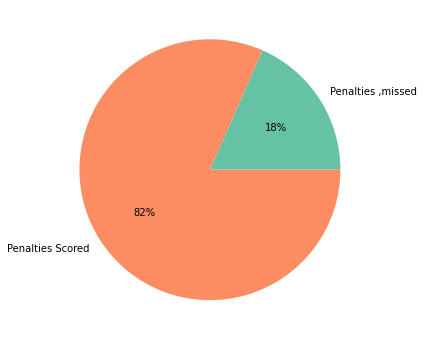

In [28]:
#pie chart for penalties missed vs scored
plt.figure(figsize = (13,6))
pl_not_scored = epl_df['Penalty_Attempted'].sum() - Total_PenaltyGoals
data = [pl_not_scored, Total_PenaltyGoals]
labels = ['Penalties ,missed', 'Penalties Scored']
color = sns.color_palette('Set2')
plt.pie(data, labels = labels, colors = color, autopct='%.0f%%')
plt.show()

In [29]:
# unique position
epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [30]:
# total FW players
epl_df[epl_df['Position'] == 'FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0


In [32]:
# players from different nations
np.size((epl_df['Nationality'].unique()))

59

<AxesSubplot:xlabel='Nationality'>

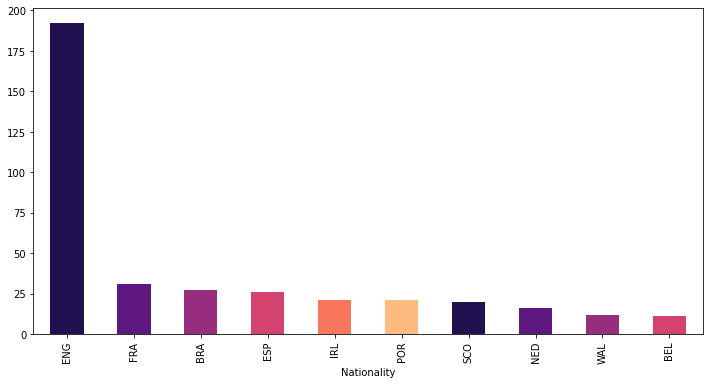

In [35]:
# most players from which countries

nationality = epl_df.groupby('Nationality').size().sort_values(ascending=False)
nationality.head(10).plot(kind='bar', figsize=(12,6), color=sns.color_palette('magma'))

<AxesSubplot:>

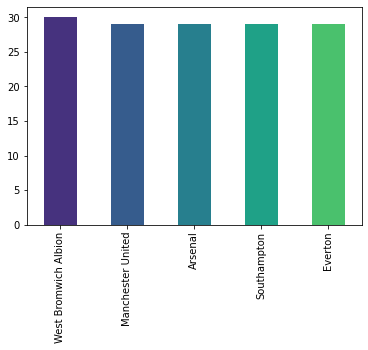

In [36]:
#clubs with maximum players in their squad
epl_df['Club'].value_counts().nlargest(5).plot(kind='bar', color = sns.color_palette('viridis'))

<AxesSubplot:>

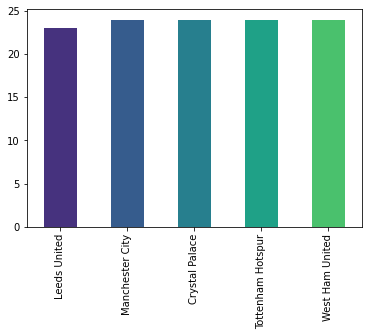

In [37]:
#clubs with least players in their squad
epl_df['Club'].value_counts().nsmallest(5).plot(kind='bar', color = sns.color_palette('viridis'))

In [38]:
# playes based on age groups
under20 = epl_df[epl_df['Age'] <= 20]

age20_25 = epl_df[(epl_df['Age'] >20) & (epl_df['Age'] <= 25)] 
age25_30 = epl_df[(epl_df['Age'] >25) & (epl_df['Age'] <= 30)] 
above30 = epl_df[epl_df['Age'] > 30]

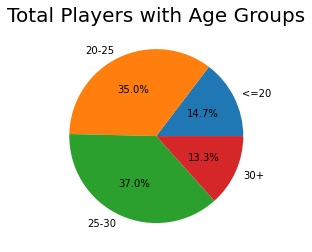

In [41]:
x = np.array([under20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),above30['Name'].count()])
mylabels = ['<=20','20-25','25-30','30+']
plt.title('Total Players with Age Groups',size = 20)
plt.pie(x, labels=mylabels, autopct='%.1f%%')
plt.show()

<AxesSubplot:>

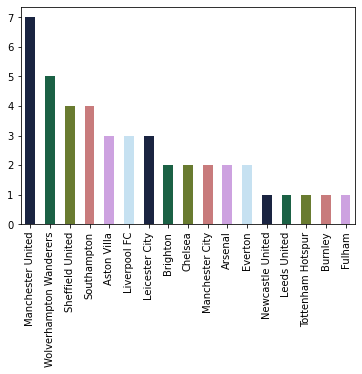

In [43]:
# total under 20 players in each club
players_under20 = epl_df[epl_df['Age'] <20]
players_under20['Club'].value_counts().plot(kind='bar',color=sns.color_palette('cubehelix'))

In [46]:
# under 20 player in manchester united

players_under20[players_under20['Club'] == 'Manchester United']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,1,0.0,0,0,0.00,0.00,0,0,1,0


In [47]:
# under 20 players in chelsea

players_under20[players_under20['Club'] == 'Chelsea']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

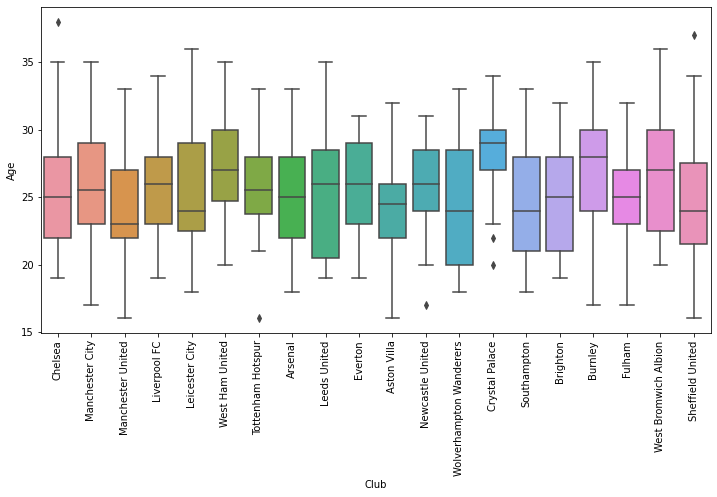

In [48]:
# average age of players in each club

plt.figure(figsize=(12,6))
sns.boxplot(x='Club', y='Age',data=epl_df)
plt.xticks(rotation= 90)

In [49]:
num_player = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum())/ num_player
data.sort_values(ascending=False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

Text(0.5, 1.0, 'Plot of Clubs vs Total Assists')

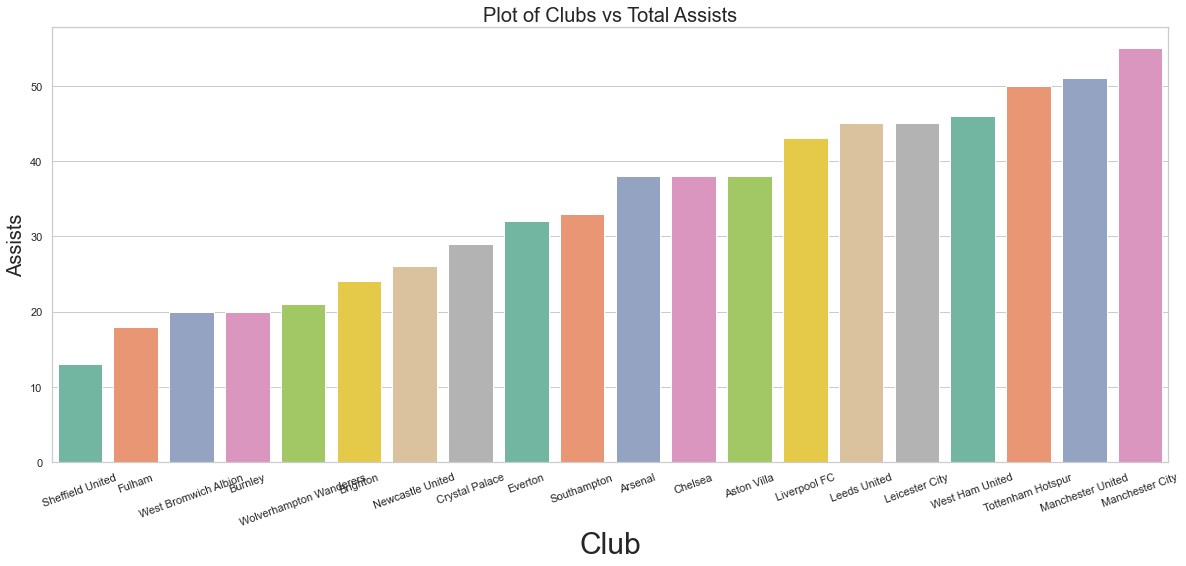

In [52]:
# total assist from each club

Assist_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Club',y='Assists',data=Assist_by_clubs.sort_values(by='Assists'),palette='Set2')
ax.set_xlabel('Club',fontsize=30)
ax.set_ylabel('Assists',fontsize=20)
plt.xticks(rotation=20)
plt.rcParams['figure.figsize']=(20,8)
plt.title('Plot of Clubs vs Total Assists', fontsize= 20)

In [53]:
# top 10 assists
top10assists = epl_df[['Name','Club','Assists','Matches']].nlargest(n=10,columns='Assists')
top10assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


Text(0.5, 1.0, 'Plot of clubs vs total goals')

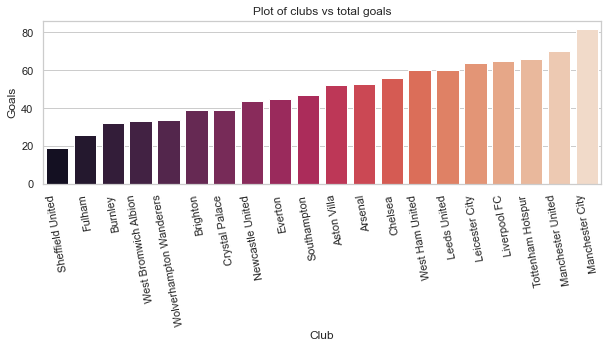

In [62]:
Goals_by_clubs = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Goals'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax = sns.barplot(x='Club',y='Goals',data=Goals_by_clubs.sort_values(by='Goals'),palette='rocket')
ax.set_xlabel('Club')
ax.set_ylabel('Goals')
plt.xticks(rotation=100)
plt.rcParams['figure.figsize']=(20,3)
plt.title('Plot of clubs vs total goals')

In [65]:
# most goals by players
top10goals = epl_df[['Name','Club','Goals','Matches']].nlargest(n=10, columns='Goals')
top10goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [66]:
top_10_goals_per_match = epl_df[['Name', 'GoalsPerMatch', 'Matches', 'Goals']].nlargest(n=10, columns='GoalsPerMatch')
top_10_goals_per_match

,Name,GoalsPerMatch,Matches,Goals
0,Mason Mount,0,36,6
1,Edouard Mendy,0,31,0
2,Timo Werner,0,35,6
3,Ben Chilwell,0,27,3
4,Reece James,0,32,1
5,César Azpilicueta,0,26,1
6,N'Golo Kanté,0,30,0
7,Jorginho,0,28,7
8,Thiago Silva,0,23,2
9,Kurt Zouma,0,24,5


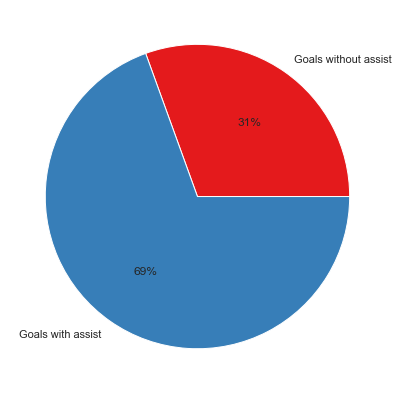

In [69]:
#pie chart - goals with assist and without assist
plt.figure(figsize=(14,7))
assist = epl_df['Assists'].sum()
data = [Total_Goals - assist, assist]
labels = ['Goals without assist', 'Goals with assist']
color = sns.color_palette('Set1')
plt.pie(data, labels=labels, colors=color, autopct='%.0f%%')
plt.show()

<AxesSubplot:title={'center':'Players with the most yellow cards'}, xlabel='Name', ylabel='Number of Yellow Cards'>

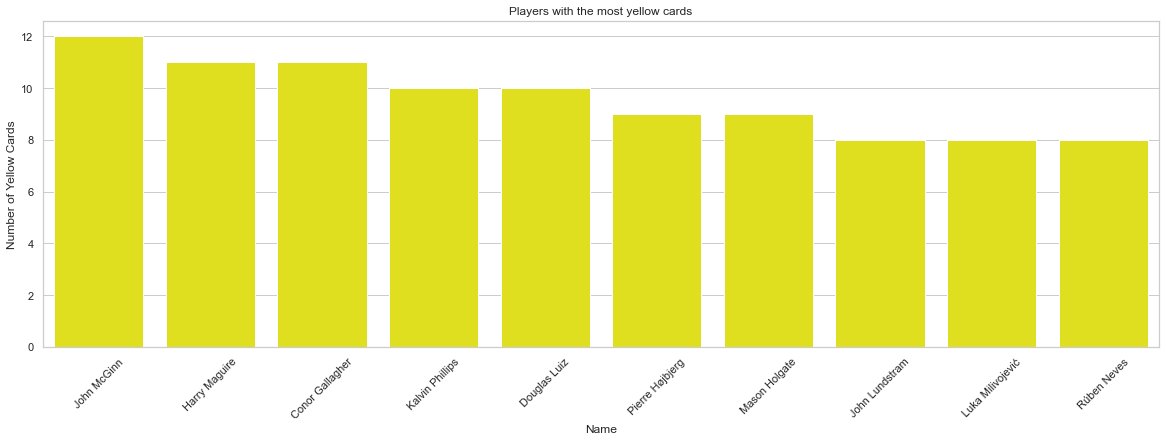

In [74]:
# top 10 players with most yellow cards
epl_yellow = epl_df.sort_values(by='Yellow_Cards', ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Players with the most yellow cards')
c=sns.barplot(x=epl_yellow['Name'],y=epl_yellow['Yellow_Cards'], label='Players', color='yellow')
plt.ylabel('Number of Yellow Cards')
c.set_xticklabels(c.get_xticklabels(),rotation=45)
c